<a href="https://colab.research.google.com/github/Brenda-Chinokoro/traffic-management-system/blob/main/TrafficManagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install ultralytics
!pip install kaggle
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [7]:
import os
from google.colab import files

print("Please upload your kaggle.json file...")
uploaded = files.upload()

Please upload your kaggle.json file...


Saving kaggle.json to kaggle.json


In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
DATASET_NAME = " along2904/vehicle-detection-yolov8-dataset"  # Change this to your dataset

print(f"Downloading dataset: {DATASET_NAME}")
!kaggle datasets download -d {DATASET_NAME}

Dataset URL: https://www.kaggle.com/datasets/along2904/vehicle-detection-yolov8-dataset
License(s): apache-2.0
 80% 121M/151M [00:00<00:00, 1.26GB/s]
100% 151M/151M [00:00<00:00, 1.15GB/s]


In [10]:
!mkdir -p /content/custom_data
!unzip -q vehicle-detection-yolov8-dataset.zip -d /content/custom_data

In [11]:
!ls -la /content/custom_data

total 32
drwxr-xr-x 5 root root 4096 Jun  2 21:17 .
drwxr-xr-x 1 root root 4096 Jun  2 21:17 ..
-rw-r--r-- 1 root root  307 Jan 19  2024 data.yaml
-rw-r--r-- 1 root root  157 Jan 19  2024 README.dataset.txt
-rw-r--r-- 1 root root 1017 Jan 19  2024 README.roboflow.txt
drwxr-xr-x 4 root root 4096 Jun  2 21:17 test
drwxr-xr-x 4 root root 4096 Jun  2 21:17 train
drwxr-xr-x 4 root root 4096 Jun  2 21:17 valid


In [12]:
!mkdir -p /content/custom_data/train/images
!mkdir -p /content/custom_data/train/labels
!mkdir -p /content/custom_data/valid/images
!mkdir -p /content/custom_data/valid/labels

In [13]:
vehicle_classes = ['Car','Bus','Motorbike','Truck']

!mkdir -p /content/custom_data/classes
with open('/content/custom_data/classes.txt', 'w') as f:
    for vehicle_class in vehicle_classes:
        f.write(f"{vehicle_class}\n")

print("Created classes.txt with the following classes:")
!cat /content/custom_data/classes.txt

Created classes.txt with the following classes:
Car
Bus
Motorbike
Truck


In [14]:
import os

for root, dirs, files in os.walk("/content"):
    print(root)
    for name in dirs:
        print("  DIR:", name)
    for name in files:
        print("  FILE:", name)

/content
  DIR: .config
  DIR: custom_data
  DIR: sample_data
  FILE: test4.jpeg
  FILE: vehicle-detection-yolov8-dataset.zip
  FILE: kaggle.json
/content/.config
  DIR: configurations
  DIR: logs
  FILE: .last_opt_in_prompt.yaml
  FILE: gce
  FILE: .last_update_check.json
  FILE: hidden_gcloud_config_universe_descriptor_data_cache_configs.db
  FILE: config_sentinel
  FILE: default_configs.db
  FILE: active_config
  FILE: .last_survey_prompt.yaml
/content/.config/configurations
  FILE: config_default
/content/.config/logs
  DIR: 2025.05.29
/content/.config/logs/2025.05.29
  FILE: 14.01.02.146440.log
  FILE: 14.01.01.430943.log
  FILE: 14.00.52.256341.log
  FILE: 14.00.20.854017.log
  FILE: 14.00.51.008524.log
  FILE: 14.00.41.804176.log
/content/custom_data
  DIR: train
  DIR: classes
  DIR: test
  DIR: valid
  FILE: README.dataset.txt
  FILE: data.yaml
  FILE: README.roboflow.txt
  FILE: classes.txt
/content/custom_data/train
  DIR: labels
  DIR: images
/content/custom_data/train/labe

In [15]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # Or yolov8s.pt, yolov8m.pt, etc.
model.train(
    data='/content/custom_data/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16  # adjust as needed for your GPU
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 106MB/s]


Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/custom_data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrain

100%|██████████| 755k/755k [00:00<00:00, 20.7MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,628 parameters, 3,011,612 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 100MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1107.6±474.0 MB/s, size: 55.1 KB)


train: Scanning /content/custom_data/train/labels... 1896 images, 39 backgrounds, 0 corrupt: 100%|██████████| 1896/1896 [00:00<00:00, 2511.38it/s]

train: New cache created: /content/custom_data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 478.5±55.5 MB/s, size: 57.7 KB)


val: Scanning /content/custom_data/valid/labels... 538 images, 12 backgrounds, 0 corrupt: 100%|██████████| 538/538 [00:00<00:00, 924.22it/s]


val: New cache created: /content/custom_data/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.07G      1.248      2.066      1.046         62        640: 100%|██████████| 119/119 [00:34<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.31it/s]

                   all        538       2771      0.688      0.581      0.667      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.56G      1.188      1.251      1.036         52        640: 100%|██████████| 119/119 [00:31<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.01it/s]

                   all        538       2771      0.728      0.692      0.748      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.58G      1.188      1.139      1.043         48        640: 100%|██████████| 119/119 [00:31<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.95it/s]

                   all        538       2771      0.754       0.76      0.812      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.59G      1.178       1.02      1.034         44        640: 100%|██████████| 119/119 [00:31<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.09it/s]

                   all        538       2771      0.706      0.741      0.771      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       2.6G      1.167      0.961      1.033         59        640: 100%|██████████| 119/119 [00:31<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.38it/s]

                   all        538       2771      0.801      0.779      0.859      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.63G      1.143     0.9115      1.021         71        640: 100%|██████████| 119/119 [00:31<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.47it/s]

                   all        538       2771      0.837      0.858      0.916      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.64G      1.125     0.8525      1.015         64        640: 100%|██████████| 119/119 [00:32<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.69it/s]

                   all        538       2771      0.784      0.736      0.824      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.66G      1.116     0.8228      1.014         50        640: 100%|██████████| 119/119 [00:32<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.90it/s]

                   all        538       2771      0.814      0.814       0.89       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.67G      1.095     0.7986      1.004         54        640: 100%|██████████| 119/119 [00:32<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.78it/s]


                   all        538       2771      0.848      0.816      0.903      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.7G      1.099     0.7666      1.007         60        640: 100%|██████████| 119/119 [00:31<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.16it/s]


                   all        538       2771      0.866      0.861      0.927      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.71G      1.082     0.7526     0.9994         43        640: 100%|██████████| 119/119 [00:31<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.96it/s]

                   all        538       2771      0.874      0.873      0.934      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.73G       1.08     0.7454     0.9987         67        640: 100%|██████████| 119/119 [00:31<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.49it/s]

                   all        538       2771      0.881      0.881       0.94      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.74G      1.075     0.7267     0.9937         70        640: 100%|██████████| 119/119 [00:31<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.92it/s]

                   all        538       2771      0.853      0.863      0.927      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.76G      1.072      0.705     0.9964         62        640: 100%|██████████| 119/119 [00:31<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.94it/s]

                   all        538       2771      0.901      0.861       0.94      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.78G      1.047     0.6808     0.9909         57        640: 100%|██████████| 119/119 [00:32<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.83it/s]

                   all        538       2771      0.887      0.851      0.939      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.79G      1.052     0.6827     0.9898         72        640: 100%|██████████| 119/119 [00:30<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.78it/s]

                   all        538       2771      0.899      0.877      0.942      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       2.8G      1.051     0.6839     0.9868         76        640: 100%|██████████| 119/119 [00:31<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.14it/s]


                   all        538       2771      0.908      0.893      0.954      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.83G      1.027     0.6659     0.9795         59        640: 100%|██████████| 119/119 [00:31<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.24it/s]

                   all        538       2771      0.912      0.909      0.959      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.85G      1.032     0.6471     0.9818         68        640: 100%|██████████| 119/119 [00:30<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.96it/s]

                   all        538       2771      0.904      0.896      0.945      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.86G      1.026     0.6468     0.9782         48        640: 100%|██████████| 119/119 [00:32<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.81it/s]

                   all        538       2771      0.904      0.871      0.944      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.87G      1.015     0.6356     0.9779         70        640: 100%|██████████| 119/119 [00:31<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.14it/s]

                   all        538       2771      0.903       0.89       0.95      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       2.9G       1.03     0.6481      0.982         54        640: 100%|██████████| 119/119 [00:31<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.52it/s]

                   all        538       2771      0.907      0.886      0.952      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.91G      1.007     0.6205      0.973         65        640: 100%|██████████| 119/119 [00:30<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.09it/s]

                   all        538       2771      0.926      0.902      0.959      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.93G      1.015     0.6313     0.9784         60        640: 100%|██████████| 119/119 [00:31<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.24it/s]

                   all        538       2771      0.906      0.912      0.951      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.94G     0.9955     0.6014     0.9663         79        640: 100%|██████████| 119/119 [00:31<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.94it/s]


                   all        538       2771      0.923      0.903      0.966       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.97G     0.9927     0.5985     0.9677         40        640: 100%|██████████| 119/119 [00:32<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.20it/s]


                   all        538       2771      0.906      0.916      0.965      0.721

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.98G     0.9903     0.5954     0.9646         43        640: 100%|██████████| 119/119 [00:32<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.91it/s]


                   all        538       2771      0.907      0.911      0.963      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         3G     0.9921     0.5949     0.9656         56        640: 100%|██████████| 119/119 [00:32<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.96it/s]


                   all        538       2771      0.917      0.925      0.964      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.01G     0.9716     0.5782     0.9607         46        640: 100%|██████████| 119/119 [00:30<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.06it/s]

                   all        538       2771      0.917      0.901      0.959      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.04G     0.9701     0.5812     0.9608        110        640: 100%|██████████| 119/119 [00:31<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.16it/s]

                   all        538       2771      0.924      0.924      0.967      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.05G     0.9685     0.5765     0.9583         64        640: 100%|██████████| 119/119 [00:32<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.40it/s]

                   all        538       2771      0.911      0.916      0.966      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.07G     0.9661     0.5654     0.9552         64        640: 100%|██████████| 119/119 [00:30<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.85it/s]

                   all        538       2771      0.917      0.931      0.972      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.08G     0.9761     0.5594     0.9574         67        640: 100%|██████████| 119/119 [00:32<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.80it/s]


                   all        538       2771      0.933      0.912      0.972      0.737

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       3.1G     0.9559     0.5552     0.9574         46        640: 100%|██████████| 119/119 [00:32<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  4.04it/s]

                   all        538       2771      0.915      0.928      0.966      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.12G     0.9436      0.543     0.9488         59        640: 100%|██████████| 119/119 [00:30<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.12it/s]


                   all        538       2771      0.921       0.92      0.967      0.732

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.14G      0.945      0.545     0.9517         46        640: 100%|██████████| 119/119 [00:32<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.10it/s]


                   all        538       2771      0.917      0.926      0.968      0.735

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.14G     0.9394     0.5481     0.9532         72        640: 100%|██████████| 119/119 [00:30<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.47it/s]

                   all        538       2771       0.91      0.934       0.97      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.17G     0.9439     0.5381     0.9481         54        640: 100%|██████████| 119/119 [00:30<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.95it/s]

                   all        538       2771      0.932      0.923      0.969      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.19G     0.9288     0.5303     0.9408         65        640: 100%|██████████| 119/119 [00:32<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.91it/s]


                   all        538       2771      0.925      0.928      0.972       0.74

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.21G     0.9263     0.5238     0.9442         53        640: 100%|██████████| 119/119 [00:31<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.94it/s]

                   all        538       2771      0.929      0.934      0.974      0.745


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.21G     0.9102     0.4865     0.9333         40        640: 100%|██████████| 119/119 [00:32<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.20it/s]


                   all        538       2771      0.938      0.917      0.972      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.24G     0.9019     0.4685       0.93         50        640: 100%|██████████| 119/119 [00:29<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.60it/s]

                   all        538       2771      0.918      0.941      0.972      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.26G     0.8954     0.4632     0.9277         38        640: 100%|██████████| 119/119 [00:29<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.90it/s]

                   all        538       2771      0.929      0.926      0.974      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.27G      0.889     0.4594     0.9245         38        640: 100%|██████████| 119/119 [00:29<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.27it/s]

                   all        538       2771      0.932      0.923      0.973      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.28G     0.8826     0.4578     0.9211         51        640: 100%|██████████| 119/119 [00:29<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.35it/s]

                   all        538       2771      0.931      0.931      0.974      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.31G     0.8762     0.4454      0.922         41        640: 100%|██████████| 119/119 [00:31<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.91it/s]


                   all        538       2771      0.928      0.934      0.975      0.746

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.32G     0.8699     0.4426     0.9204         23        640: 100%|██████████| 119/119 [00:30<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.73it/s]


                   all        538       2771      0.927      0.935      0.975       0.75

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.34G     0.8684       0.44     0.9209         44        640: 100%|██████████| 119/119 [00:29<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.22it/s]

                   all        538       2771      0.916      0.937      0.973      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.35G     0.8618     0.4351     0.9147         54        640: 100%|██████████| 119/119 [00:29<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.90it/s]

                   all        538       2771      0.931      0.927      0.976      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.38G     0.8604     0.4342     0.9162         49        640: 100%|██████████| 119/119 [00:30<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  4.07it/s]


                   all        538       2771      0.932      0.939      0.976      0.754

50 epochs completed in 0.509 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.19it/s]


                   all        538       2771      0.931      0.939      0.976      0.754
                   bus        135        174      0.953       0.93      0.979        0.8
                   car        330        768      0.945      0.954      0.985      0.797
             motorbike        420       1280      0.916      0.917      0.966      0.646
                 truck        310        549      0.911      0.956      0.973      0.772
Speed: 0.3ms preprocess, 2.3ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x785dbd775d10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0


image 1/1 /content/custom_data/valid/images/-310-DUNG-NGAM-XE-MA-CU-TUONG-BAN-TOC-DO-D-xekhach-giuongnam-ngamxe-benxemiendong_mp4-12_jpg.rf.645e5791cc99f3a45341c9a066da81eb.jpg: 640x640 3 buss, 3 motorbikes, 1 truck, 9.5ms
Speed: 2.2ms preprocess, 9.5ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


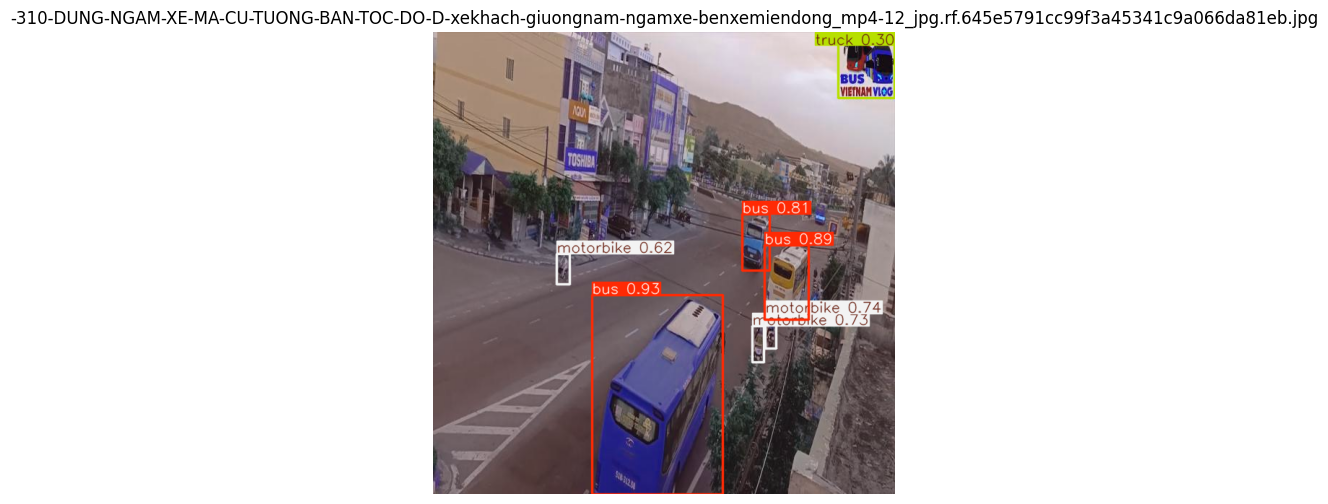


image 1/1 /content/custom_data/valid/images/-310-DUNG-NGAM-XE-MA-CU-TUONG-BAN-TOC-DO-D-xekhach-giuongnam-ngamxe-benxemiendong_mp4-14_jpg.rf.3641f62e3810ccae7097f6ae6adf0b79.jpg: 640x640 2 buss, 2 motorbikes, 2 trucks, 13.2ms
Speed: 2.6ms preprocess, 13.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


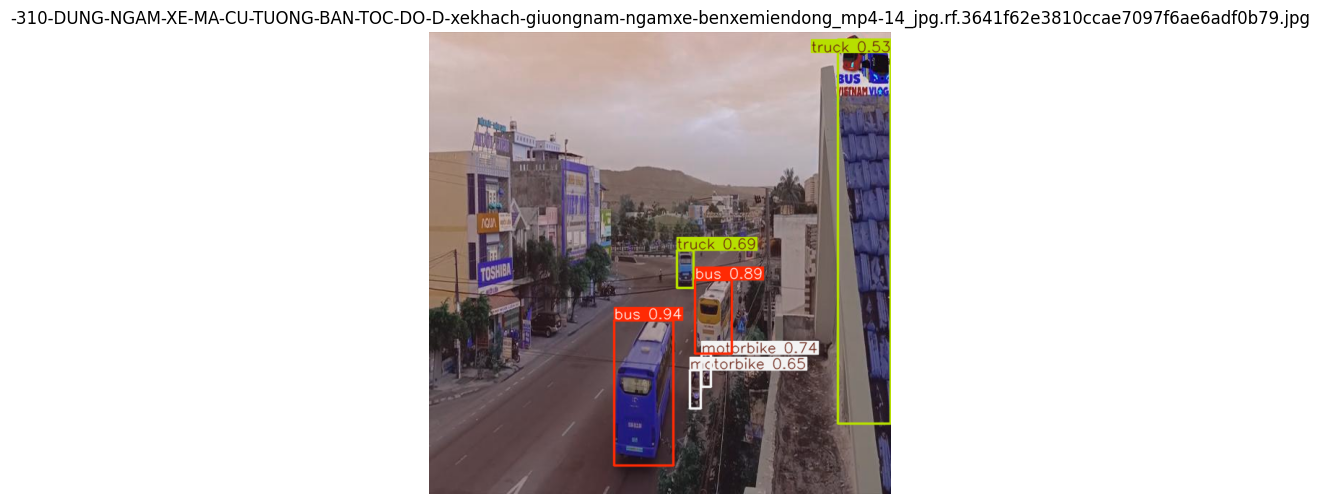


image 1/1 /content/custom_data/valid/images/-310-DUNG-NGAM-XE-MA-CU-TUONG-BAN-TOC-DO-D-xekhach-giuongnam-ngamxe-benxemiendong_mp4-15_jpg.rf.edbb614bc415c32eb801ba98ab89f678.jpg: 640x640 2 buss, 3 motorbikes, 2 trucks, 10.8ms
Speed: 4.6ms preprocess, 10.8ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)


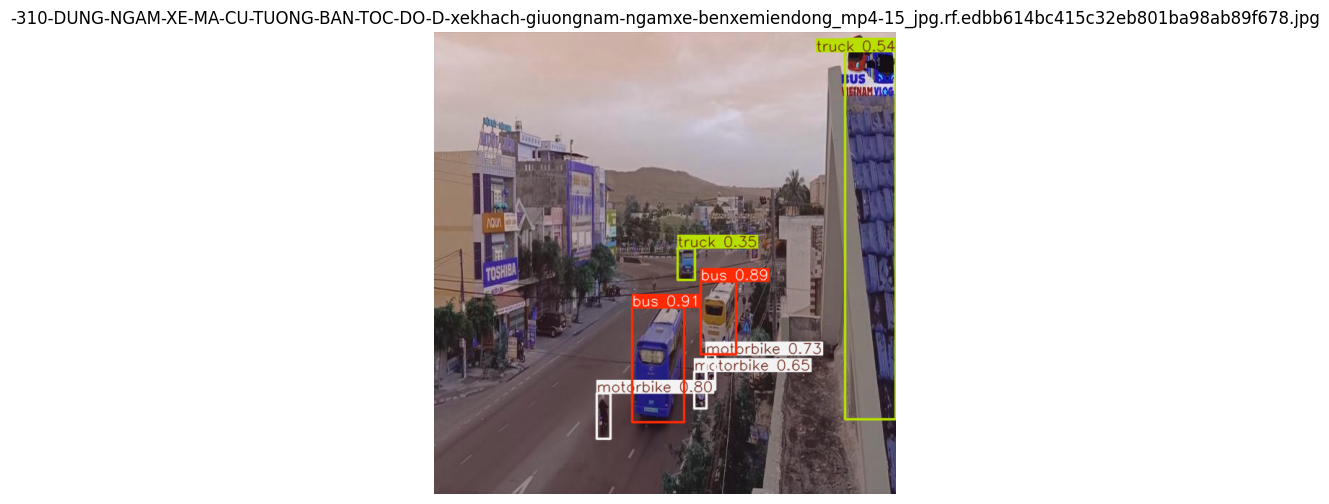


image 1/1 /content/custom_data/valid/images/-310-DUNG-NGAM-XE-MA-CU-TUONG-BAN-TOC-DO-D-xekhach-giuongnam-ngamxe-benxemiendong_mp4-18_jpg.rf.3e2f22efda491a6f5474c680d68fb480.jpg: 640x640 2 buss, 1 motorbike, 2 trucks, 14.7ms
Speed: 3.6ms preprocess, 14.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


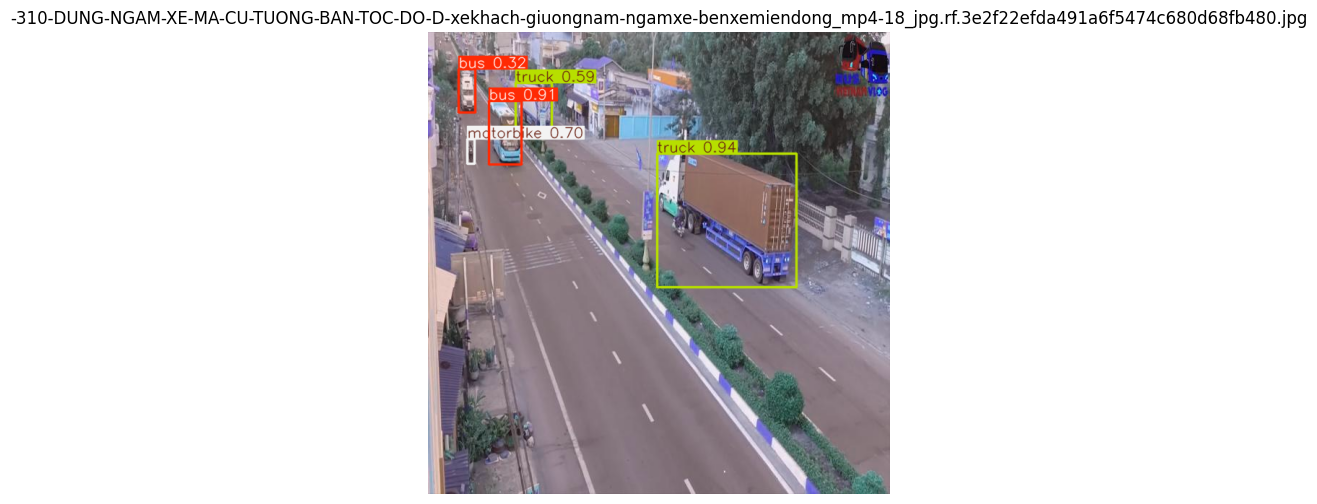


image 1/1 /content/custom_data/valid/images/-310-DUNG-NGAM-XE-MA-CU-TUONG-BAN-TOC-DO-D-xekhach-giuongnam-ngamxe-benxemiendong_mp4-1_jpg.rf.e8aca143858d739a6cedb1210952ba38.jpg: 640x640 3 buss, 2 trucks, 12.5ms
Speed: 4.2ms preprocess, 12.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


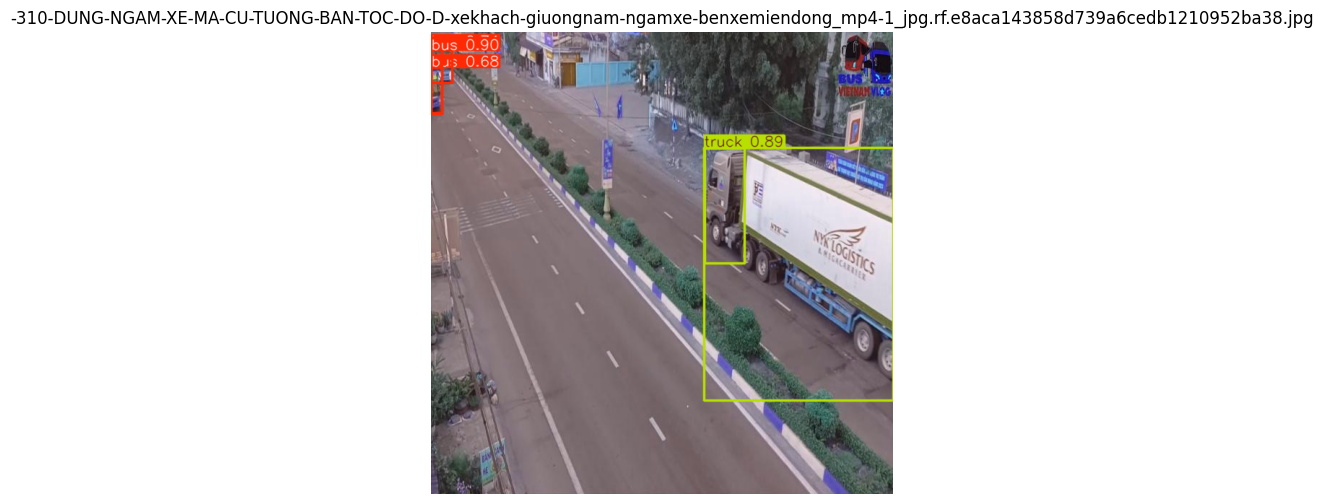


image 1/1 /content/custom_data/valid/images/-310-DUNG-NGAM-XE-MA-CU-TUONG-BAN-TOC-DO-D-xekhach-giuongnam-ngamxe-benxemiendong_mp4-264_jpg.rf.ab02fdc145597ec15673c7e3cc20a8ea.jpg: 640x640 1 bus, 1 motorbike, 9.2ms
Speed: 2.6ms preprocess, 9.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


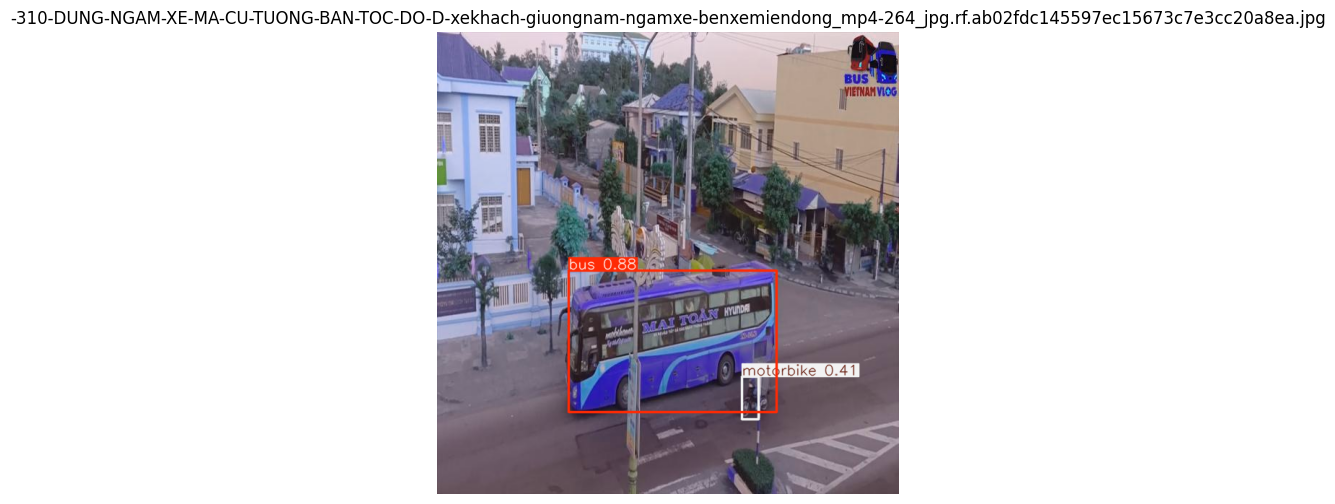


image 1/1 /content/custom_data/valid/images/-310-DUNG-NGAM-XE-MA-CU-TUONG-BAN-TOC-DO-D-xekhach-giuongnam-ngamxe-benxemiendong_mp4-265_jpg.rf.4186aefc59869030d8c714769d367f7a.jpg: 640x640 1 bus, 1 motorbike, 9.3ms
Speed: 2.7ms preprocess, 9.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


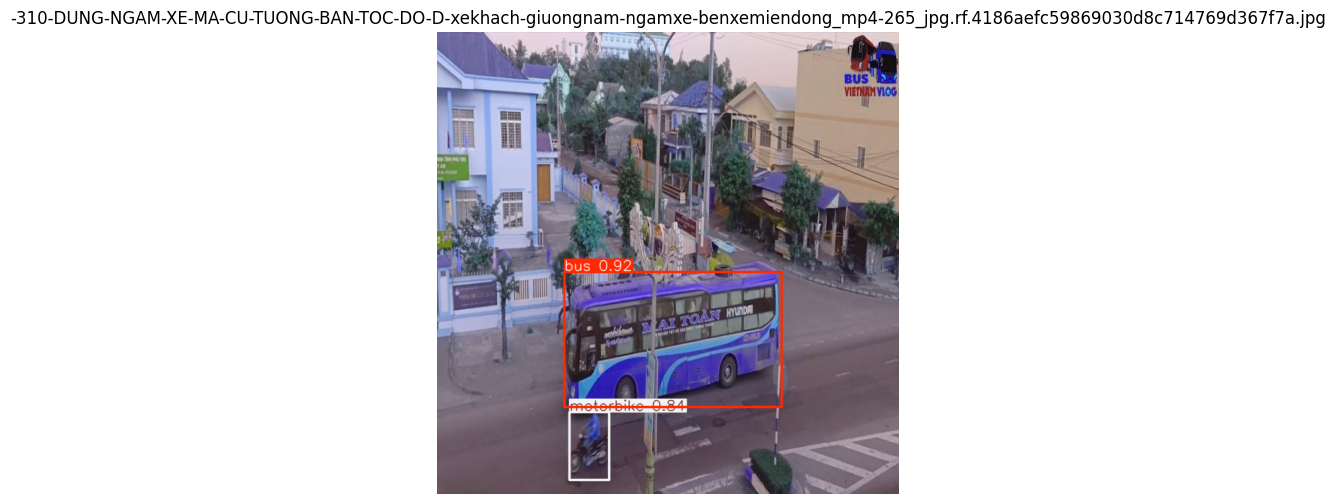


image 1/1 /content/custom_data/valid/images/-310-DUNG-NGAM-XE-MA-CU-TUONG-BAN-TOC-DO-D-xekhach-giuongnam-ngamxe-benxemiendong_mp4-266_jpg.rf.ac7d3b08187e3600a02d6eb3fba22c5d.jpg: 640x640 1 bus, 2 motorbikes, 15.0ms
Speed: 2.9ms preprocess, 15.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


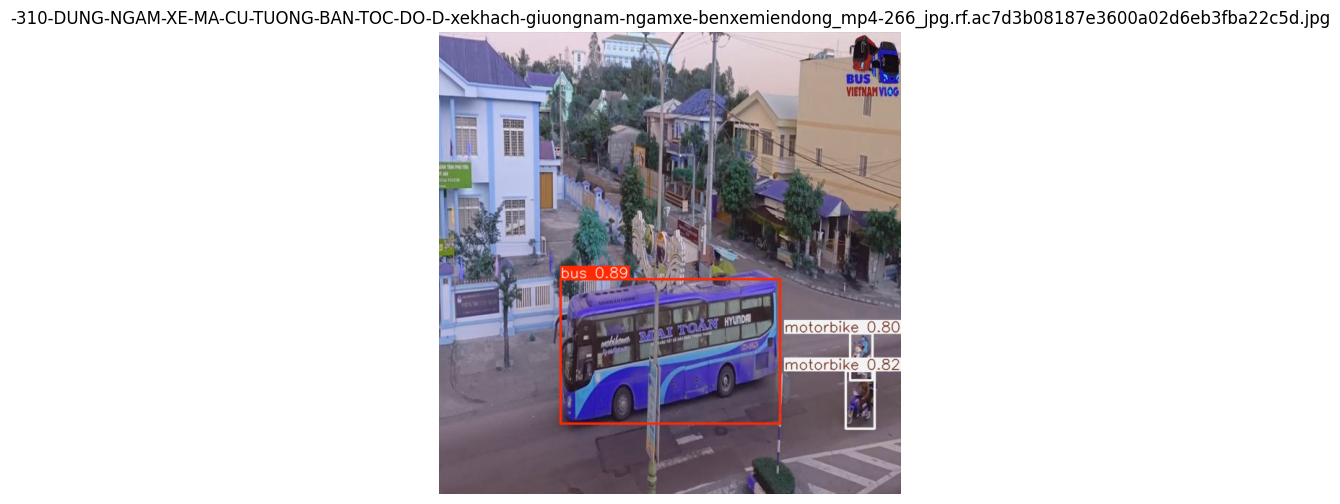


image 1/1 /content/custom_data/valid/images/-310-DUNG-NGAM-XE-MA-CU-TUONG-BAN-TOC-DO-D-xekhach-giuongnam-ngamxe-benxemiendong_mp4-29_jpg.rf.ddb717949794f59f18c14e96779de69e.jpg: 640x640 1 bus, 1 truck, 8.9ms
Speed: 2.9ms preprocess, 8.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


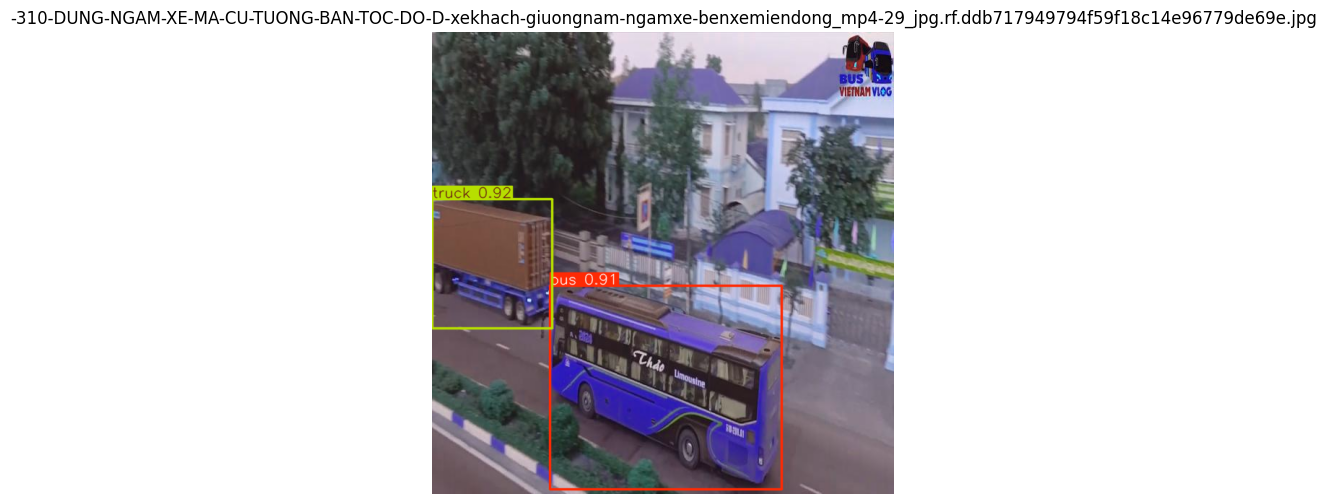


image 1/1 /content/custom_data/valid/images/-310-DUNG-NGAM-XE-MA-CU-TUONG-BAN-TOC-DO-D-xekhach-giuongnam-ngamxe-benxemiendong_mp4-2_jpg.rf.4b45ec698bf799900664624101653edb.jpg: 640x640 2 buss, 1 truck, 11.9ms
Speed: 2.6ms preprocess, 11.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


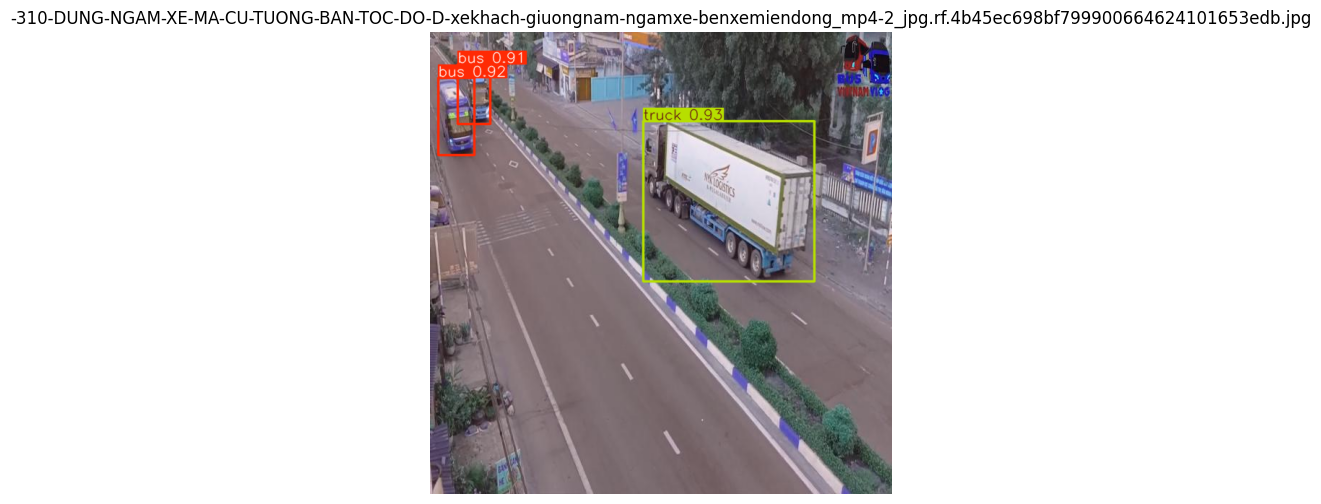

In [16]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to images folder (change to 'train/images' if you want)
img_dir = '/content/custom_data/valid/images'
img_files = sorted([os.path.join(img_dir, f) for f in os.listdir(img_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])[:10]

for img_path in img_files:
    # Run inference
    results = model(img_path)
    # Get the rendered image with bounding boxes
    result_img = results[0].plot() if hasattr(results[0], "plot") else results[0].orig_img
    # Display
    plt.figure(figsize=(8, 6))
    plt.imshow(result_img)
    plt.title(os.path.basename(img_path))
    plt.axis('off')
    plt.show()

In [21]:
from google.colab import files
uploaded = files.upload()  # Choose your image file (e.g., mycar.jpg)

Saving Screenshot 2025-05-13 195719.png to Screenshot 2025-05-13 195719.png



image 1/1 /content/Screenshot 2025-05-13 195719.png: 480x640 3 buss, 2 cars, 1 motorbike, 8.2ms
Speed: 2.5ms preprocess, 8.2ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


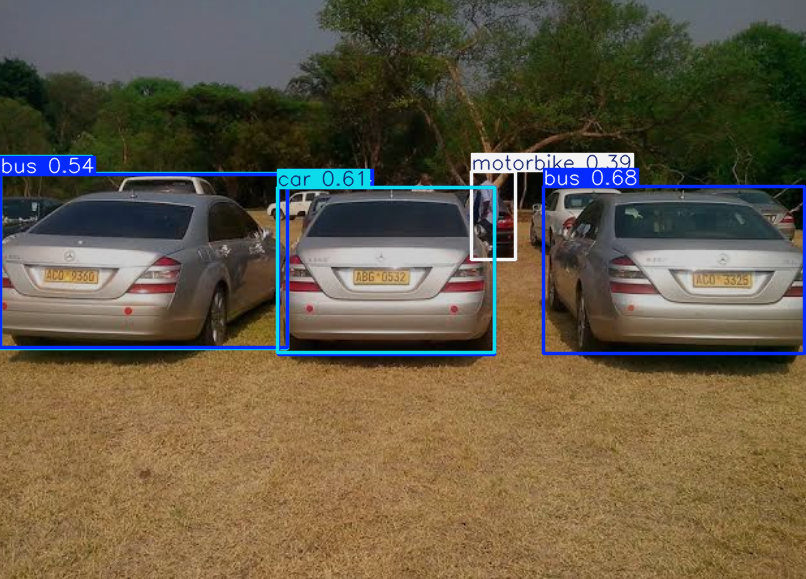

In [22]:
results = model('Screenshot 2025-05-13 195719.png')
results[0].show()  # Display the image with bounding boxes